<a href="https://colab.research.google.com/github/aynara-codes/AluraStore_Challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
print (tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [ ]:
#Diccionario por cada tienda

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

In [ ]:
#Ingreso total por cada tienda

ingresos_por_tienda = {}

for nombre_tienda, df in tiendas.items():
  if 'Precio' in df.columns:

    df['Precio'] = pd.to_numeric(df['Precio'])

    Facturacion = (sum (df['Precio']))

    print (f"La facturación de {nombre_tienda} es de: COP {Facturacion:,.2f}")
    ingresos_por_tienda[nombre_tienda] = Facturacion


La facturación de Tienda 1 es de: COP 1,150,880,400.00
La facturación de Tienda 2 es de: COP 1,116,343,500.00
La facturación de Tienda 3 es de: COP 1,098,019,600.00
La facturación de Tienda 4 es de: COP 1,038,375,700.00


In [ ]:
ingresos_por_tienda['Tienda 1']

1150880400.0

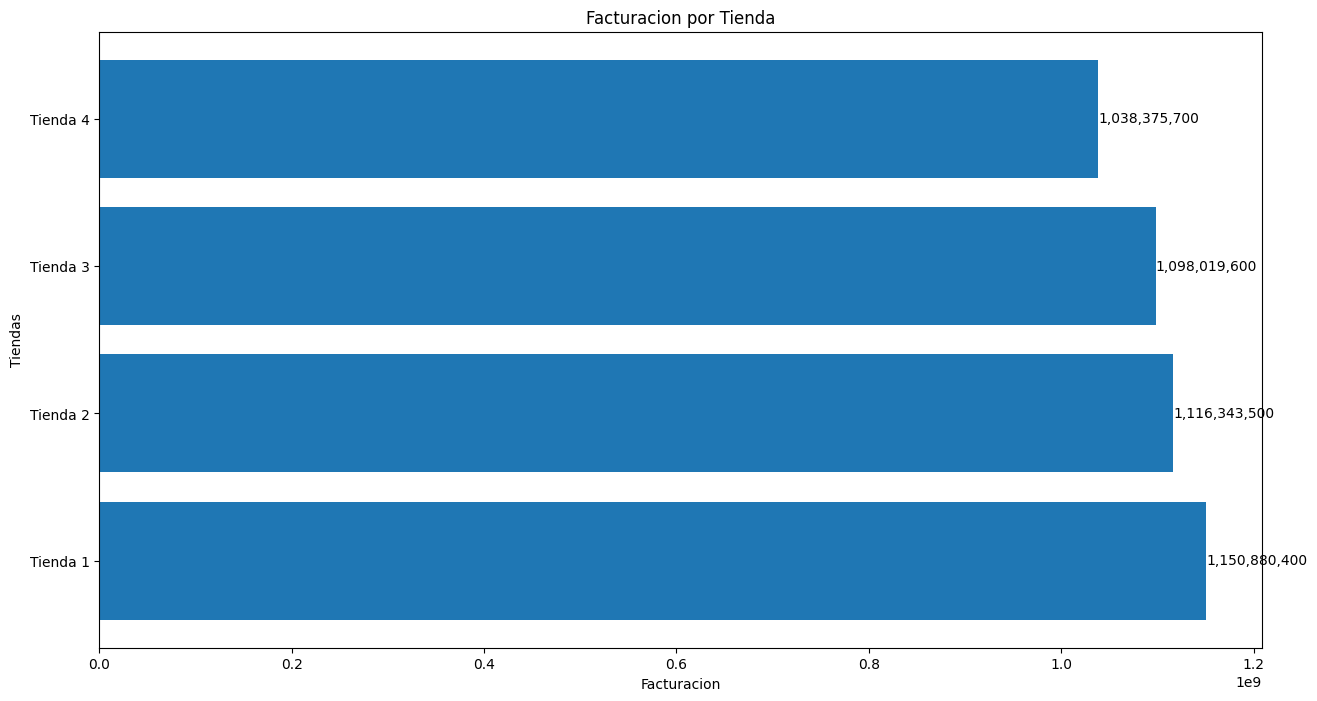

In [ ]:
def barras_facturacion():
  barras = list(ingresos_por_tienda.keys())
  valores = list(ingresos_por_tienda.values())

  plt.figure(figsize=(15, 8))
  bars=plt.barh(barras, valores)
  plt.xlabel('Facturacion')
  plt.ylabel('Tiendas')
  plt.title('Facturacion por Tienda')

  plt.bar_label(bars, labels=[f'{v:,.0f}' for v in valores], label_type='edge')
  plt.show()

barras_facturacion()

# 2. Ventas por categoría

In [ ]:
#Ventas por categoria
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

ventas_por_categoria = {}

for nombre_tienda, df in tiendas.items():
    if 'Categoría del Producto' in df.columns:
      ventas_categoria = df['Categoría del Producto'].value_counts()
      ventas_por_categoria[nombre_tienda] = ventas_categoria

print("Ventas por Categoría:")
print(ventas_por_categoria)

Ventas por Categoría:
{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría del Producto
Muebles     

In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
mayor_categoria_ventas = {}
menor_categoria_ventas = {}

def categorias_ventas ():
    for nombre_tienda, ventas in ventas_por_categoria.items():

      mayor_categoria_ventas[nombre_tienda] = ventas.idxmax()
      menor_categoria_ventas[nombre_tienda] = ventas.idxmin()
      print(f"La categoría con mayor venta en {nombre_tienda} es: {mayor_categoria_ventas[nombre_tienda]}")
      print(f"La categoría con menor venta en {nombre_tienda} es: {menor_categoria_ventas[nombre_tienda]}\n")

categorias_ventas()



La categoría con mayor venta en Tienda 1 es: Muebles
La categoría con menor venta en Tienda 1 es: Artículos para el hogar

La categoría con mayor venta en Tienda 2 es: Muebles
La categoría con menor venta en Tienda 2 es: Artículos para el hogar

La categoría con mayor venta en Tienda 3 es: Muebles
La categoría con menor venta en Tienda 3 es: Instrumentos musicales

La categoría con mayor venta en Tienda 4 es: Muebles
La categoría con menor venta en Tienda 4 es: Instrumentos musicales



# 3. Calificación promedio de la tienda


In [ ]:
#Calificacion promedio

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

Calificacion_promedio = {}

for nombre_tienda, df in tiendas.items():

   if 'Calificación' in df.columns:

    df['Calificación'] = pd.to_numeric(df['Calificación'])
    calificacion_promedio = df['Calificación'].mean()
    calificacion_redondeada = round(calificacion_promedio, 2)
    Calificacion_promedio [nombre_tienda] = float(calificacion_redondeada)

    print (f"La calificación promedio de {nombre_tienda} es de: {Calificacion_promedio[nombre_tienda]}")


La calificación promedio de Tienda 1 es de: 3.98
La calificación promedio de Tienda 2 es de: 4.04
La calificación promedio de Tienda 3 es de: 4.05
La calificación promedio de Tienda 4 es de: 4.0


In [ ]:
Calificacion_promedio["Tienda 1"]

3.98

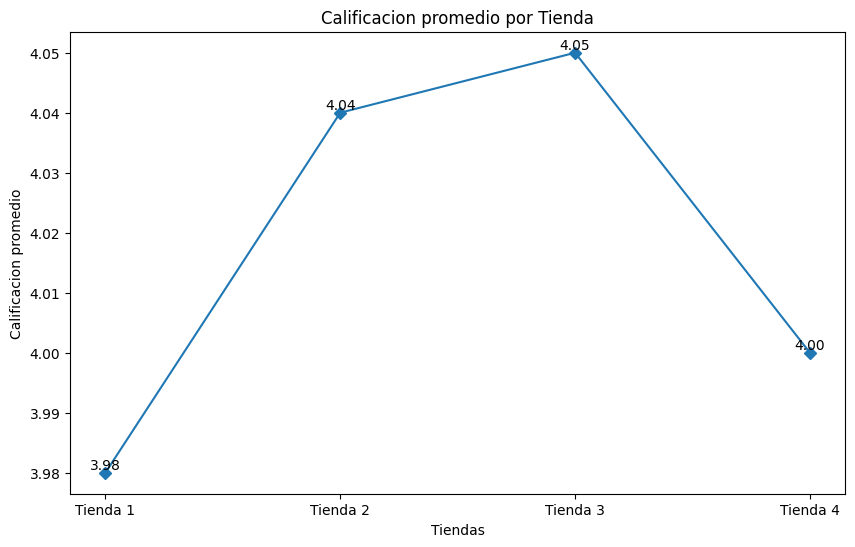

In [ ]:
def lineas_calificacion():
  x = list(tiendas.keys())
  y = list(Calificacion_promedio.values())

  plt.figure(figsize=(10, 6))

  plt.plot(x,y, marker= 'D')
  plt.xlabel('Tiendas')
  plt.ylabel('Calificacion promedio')
  plt.title('Calificacion promedio por Tienda')

  for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom')

  plt.show()


lineas_calificacion()

# 4. Productos más y menos vendidos

In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

Productos_mas_vendidos = {}
Productos_menos_vendidos = {}

for nombre_tienda, df in tiendas.items():

    df['Producto'] = df['Producto'].str.strip()
    productos_mas_vendidos = df['Producto'].value_counts().head(5)
    productos_menos_vendidos = df['Producto'].value_counts().tail(5)
    Productos_mas_vendidos[nombre_tienda] = productos_mas_vendidos
    Productos_menos_vendidos[nombre_tienda] = productos_menos_vendidos
    print(f"Los productos más vendidos en {nombre_tienda} son:\n {productos_mas_vendidos} \n")
    print(f"Los productos menos vendidos en {nombre_tienda} son:\n {productos_menos_vendidos} \n")


Los productos más vendidos en Tienda 1 son:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64 

Los productos menos vendidos en Tienda 1 son:
 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64 

Los productos más vendidos en Tienda 2 son:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64 

Los productos menos vendidos en Tienda 2 son:
 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64 

Los productos más vendidos en Tienda 3 son:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king      

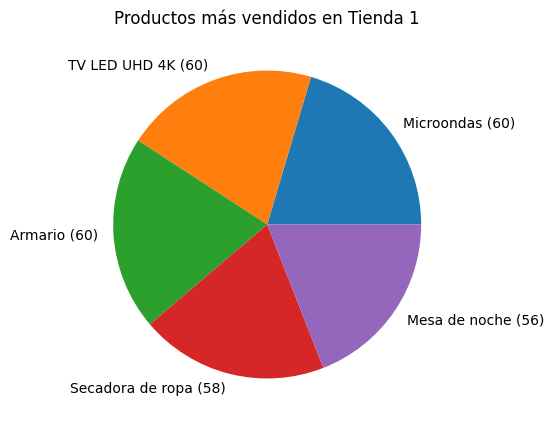

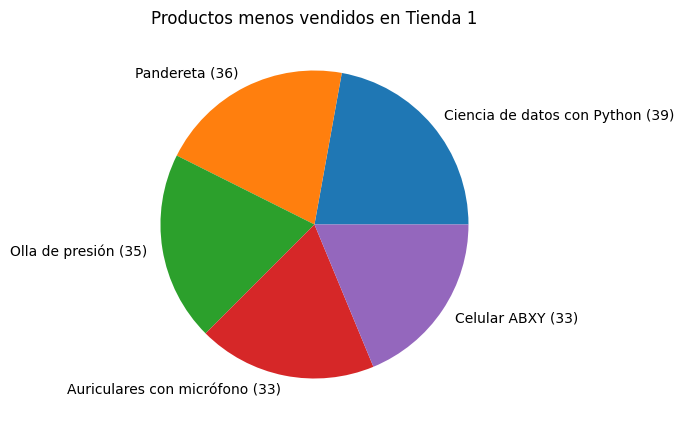

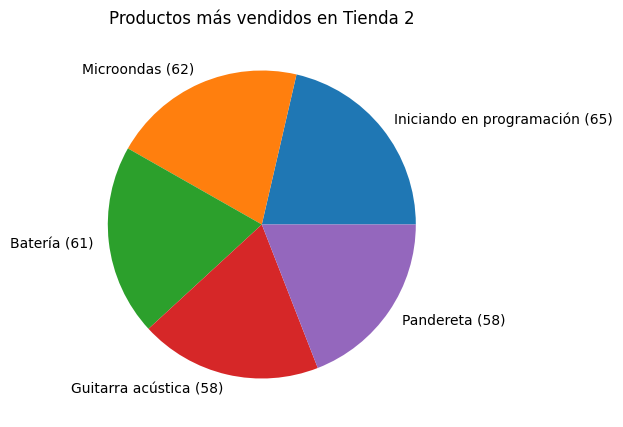

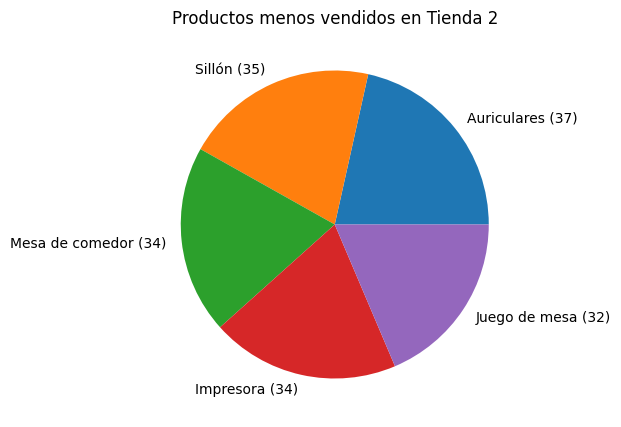

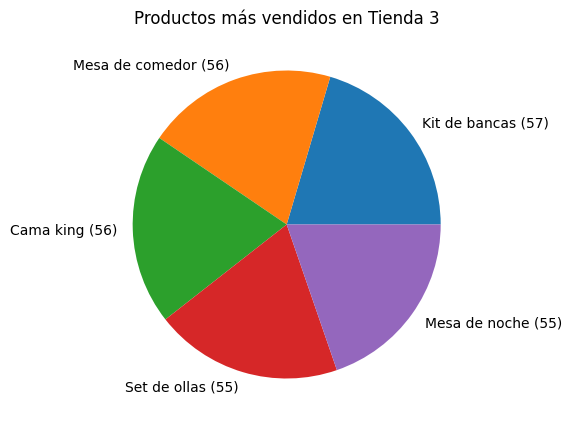

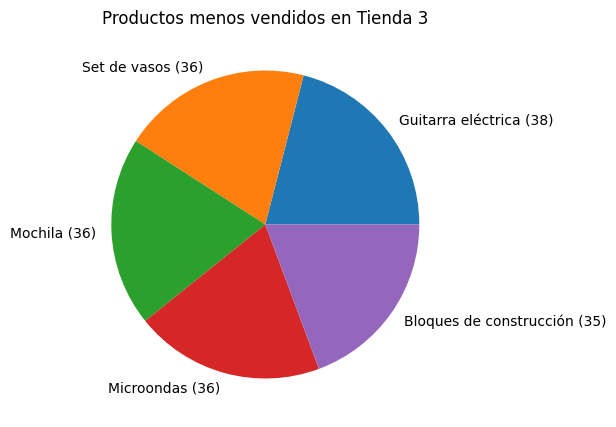

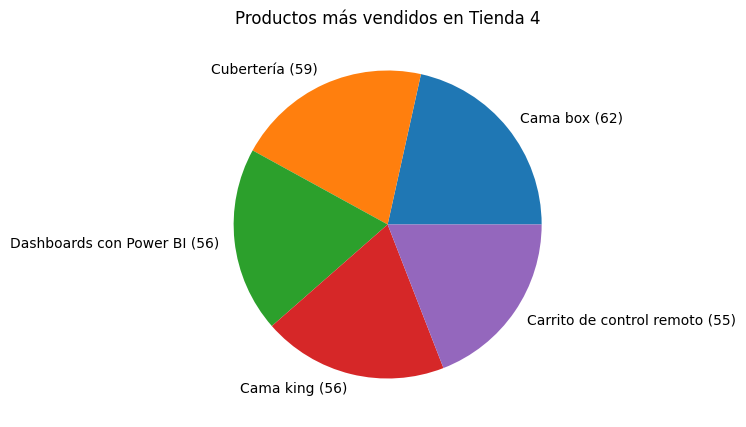

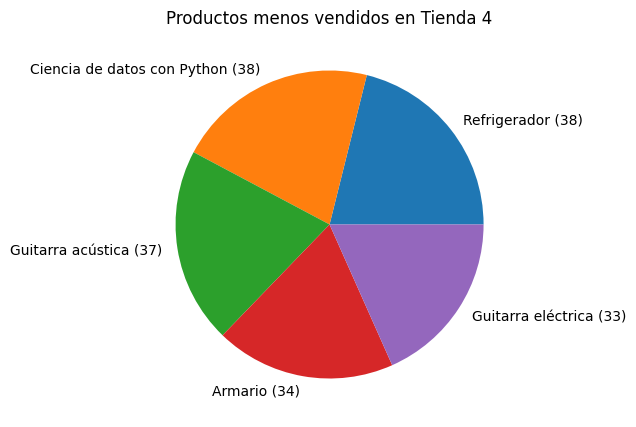

In [ ]:

def pie_ventas(nombre_tienda):
   x = Productos_mas_vendidos[nombre_tienda].index
   y = Productos_mas_vendidos[nombre_tienda].values

   plt.figure(figsize=(5, 5))
   plt.pie(y, labels=[f"{label} ({value})" for label, value in zip(x, y)])
   plt.title(f'Productos más vendidos en {nombre_tienda}')
   #plt.pie(y, labels= x)
   plt.show()

def pie_menos_ventas(nombre_tienda):
   x = Productos_menos_vendidos[nombre_tienda].index
   y = Productos_menos_vendidos[nombre_tienda].values

   plt.figure(figsize=(5, 5))
   plt.pie(y, labels=[f"{label} ({value})" for label, value in zip(x, y)])
   plt.title(f'Productos menos vendidos en {nombre_tienda}')
   #plt.pie(y, labels= x)
   plt.show()

for nombre_tienda in tiendas.keys():
  pie_ventas(nombre_tienda)
  pie_menos_ventas(nombre_tienda)

# 5.Costo de envio promedio

In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

Envio_promedio = {}

for nombre_tienda, df in tiendas.items():
  if 'Costo de envío' in df.columns:

    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'])
    promedio_tienda = round(df['Costo de envío'].mean(), 2)

    Envio_promedio[nombre_tienda] = float(promedio_tienda)
    print (f"El envío promedio de {nombre_tienda} es de: COP {Envio_promedio[nombre_tienda]:,.2f}")

El envío promedio de Tienda 1 es de: COP 26,018.61
El envío promedio de Tienda 2 es de: COP 25,216.24
El envío promedio de Tienda 3 es de: COP 24,805.68
El envío promedio de Tienda 4 es de: COP 23,459.46


In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

Costo_de_Envio_total = {}

for nombre_tienda, df in tiendas.items():
  if 'Costo de envío' in df.columns:

    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'])
    promedio_tienda = sum(df['Costo de envío'].values)
    promedio_tienda = round(promedio_tienda, 2)

    Costo_de_Envio_total[nombre_tienda] = float(promedio_tienda)
    print (f"El costo de envio total de la {nombre_tienda} es de: COP {Costo_de_Envio_total[nombre_tienda]:,.2f}")

El costo de envio total de la Tienda 1 es de: COP 61,377,900.00
El costo de envio total de la Tienda 2 es de: COP 59,485,100.00
El costo de envio total de la Tienda 3 es de: COP 58,516,600.00
El costo de envio total de la Tienda 4 es de: COP 55,317,400.00


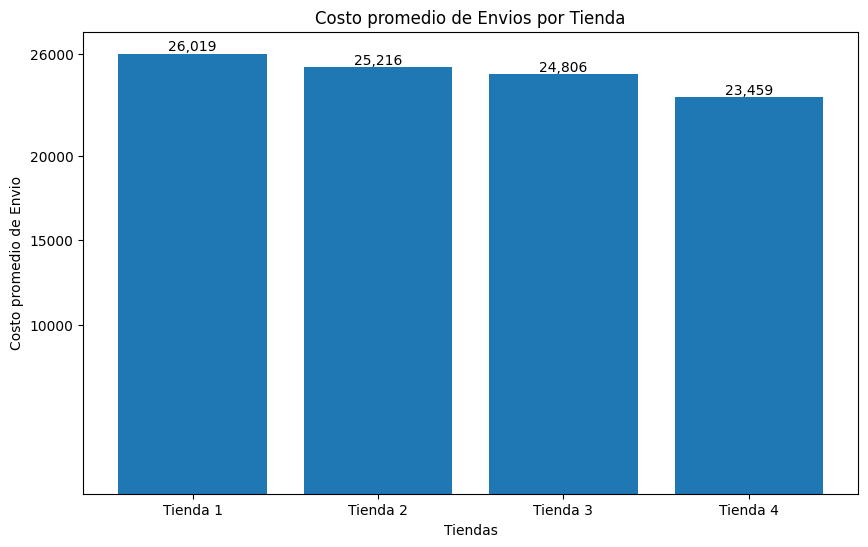

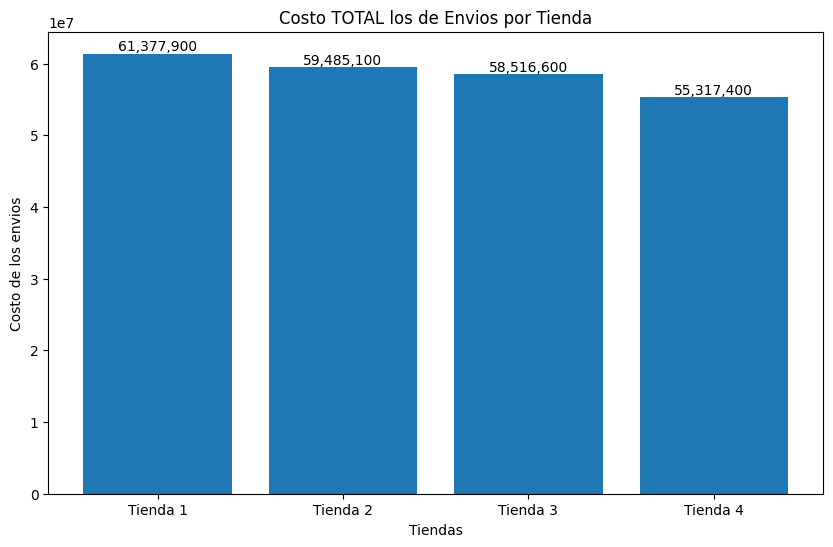

In [ ]:
def barras_envio():

  x = list(tiendas.keys())
  y = list(Envio_promedio.values())

  plt.figure(figsize=(10, 6))
  bars=plt.bar(x,y)
  plt.xlabel('Tiendas')
  plt.ylabel('Costo promedio de Envio')
  plt.yticks([26000,20000,15000,10000])
  plt.title('Costo promedio de Envios por Tienda')
  plt.bar_label(bars, labels=[f'{v:,.0f}' for v in y], label_type='edge')
  plt.show()

  x2 = list(tiendas.keys())
  y2 = list(Costo_de_Envio_total.values())
  plt.figure(figsize=(10, 6))
  bars=plt.bar(x2,y2)
  plt.xlabel('Tiendas')
  plt.ylabel('Costo de los envios')
 # plt.yticks([26000,20000,15000,10000])
  plt.title('Costo TOTAL los de Envios por Tienda')
  plt.bar_label(bars, labels=[f'{v:,.0f}' for v in y2], label_type='edge')
  plt.show()



barras_envio()


---

#Resumen de los analisis realizados

##Facturacion total por tienda
---
### Como podemos observar la *Tienda 1* es la que mayor ingresos tiene, con 1.150.880,400 pesos colombianos de ventas. Mientras que la *Tienda 4* es la que tuvo menor facturacion, con un total de 1.038.375,700 COP.
---





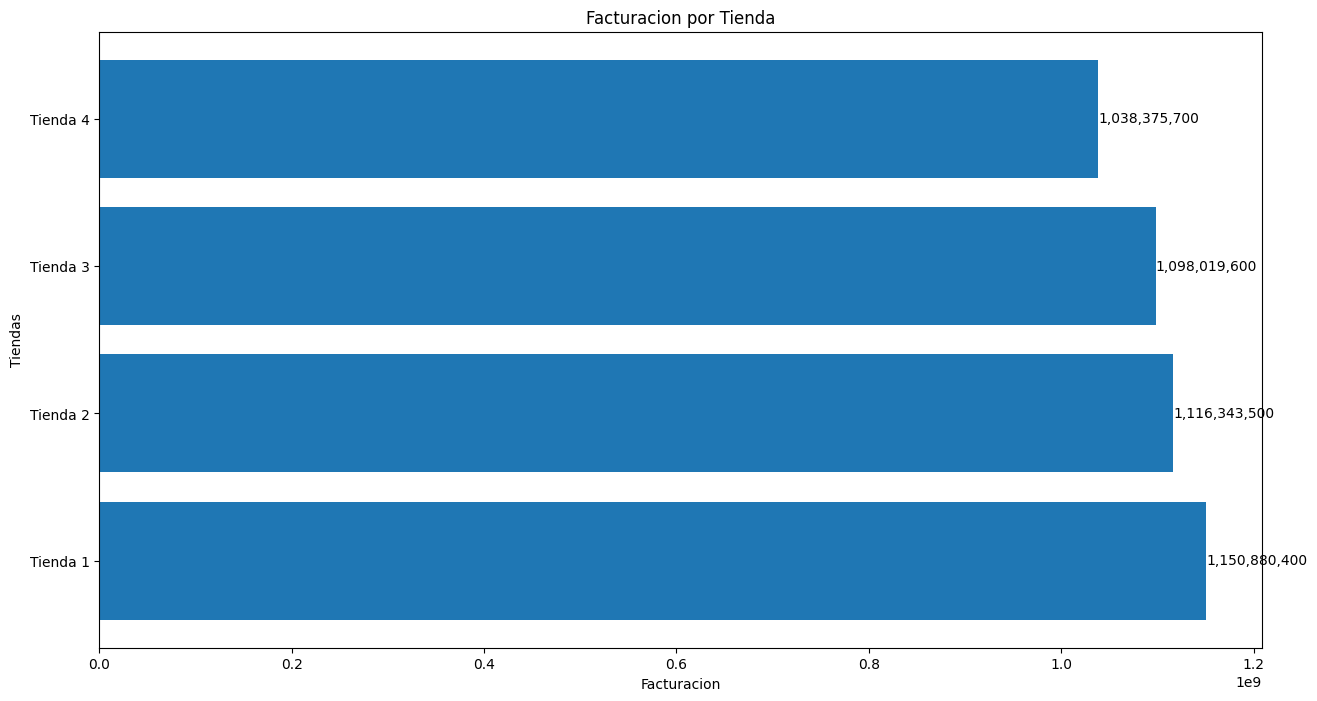

In [ ]:
barras_facturacion()

## Ventas por categoria
---





In [ ]:
categorias_ventas()

La categoría con mayor venta en Tienda 1 es: Muebles
La categoría con menor venta en Tienda 1 es: Artículos para el hogar

La categoría con mayor venta en Tienda 2 es: Muebles
La categoría con menor venta en Tienda 2 es: Artículos para el hogar

La categoría con mayor venta en Tienda 3 es: Muebles
La categoría con menor venta en Tienda 3 es: Instrumentos musicales

La categoría con mayor venta en Tienda 4 es: Muebles
La categoría con menor venta en Tienda 4 es: Instrumentos musicales



---
##Calificacion promedio de los clientes
---
### La *Tienda 4* es la que cuenta con un promedio de 4,05 calificaciones, siendo el mejor. Mientras que la *Tienda 1* cuenta con un promedio de 3,98. siendo la tienda con peor calificacion




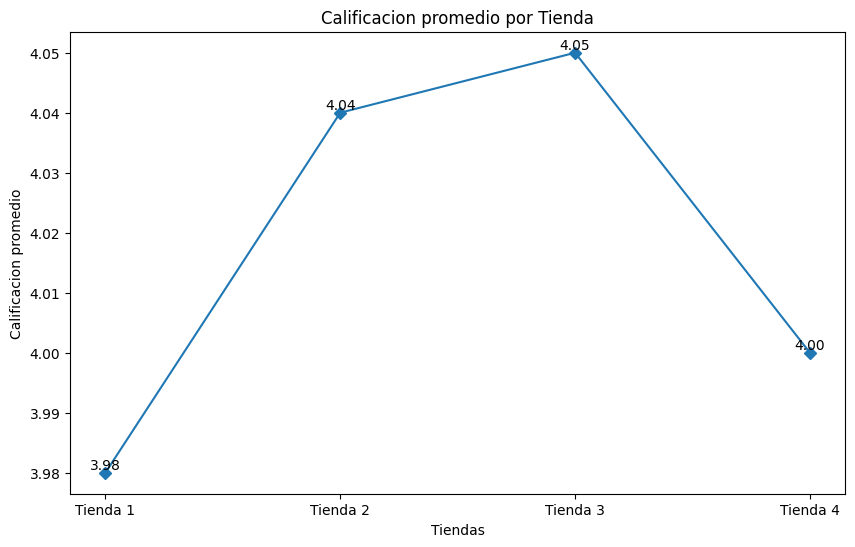

In [ ]:
lineas_calificacion()

---
##Productos mas y menos vendidos
---



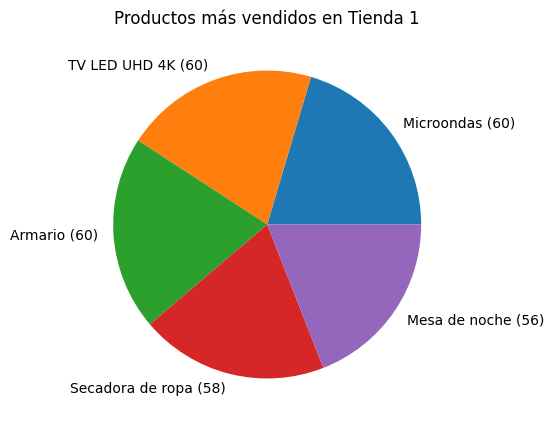

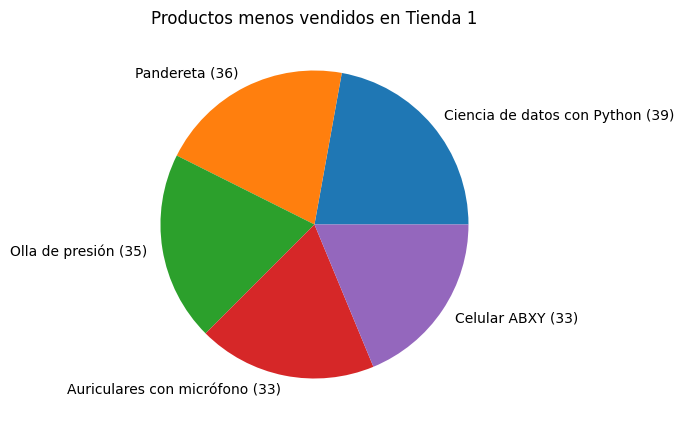

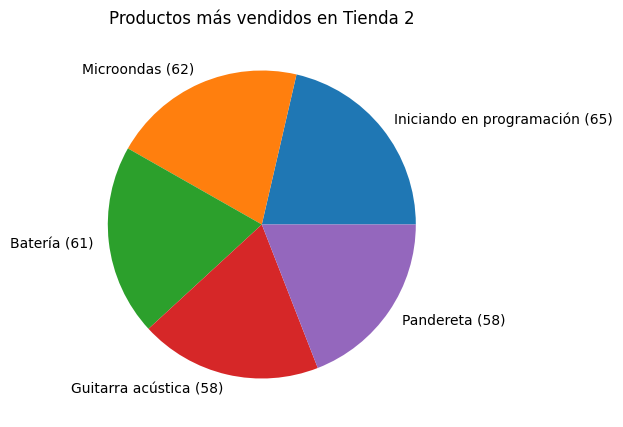

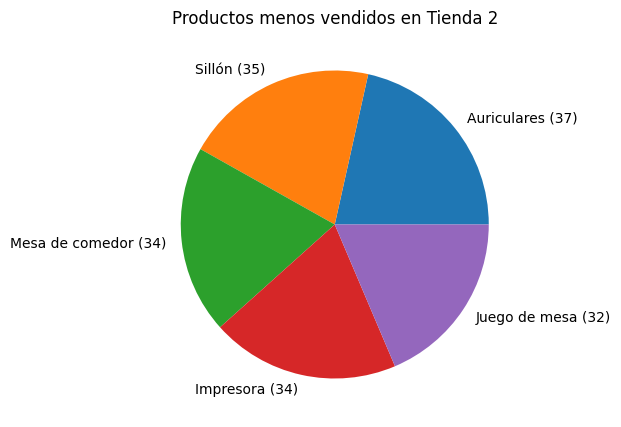

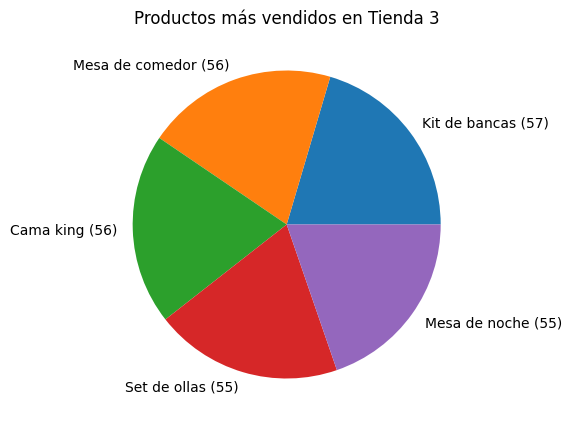

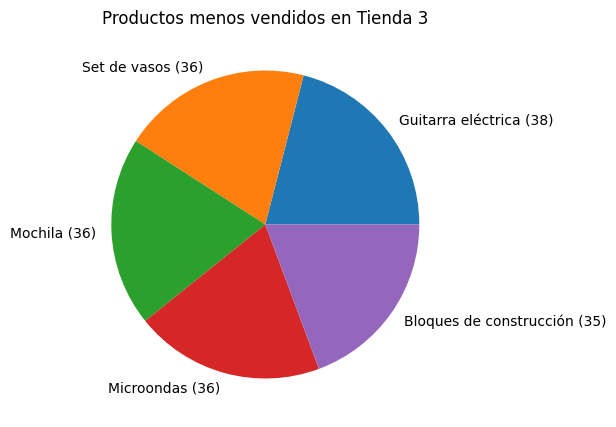

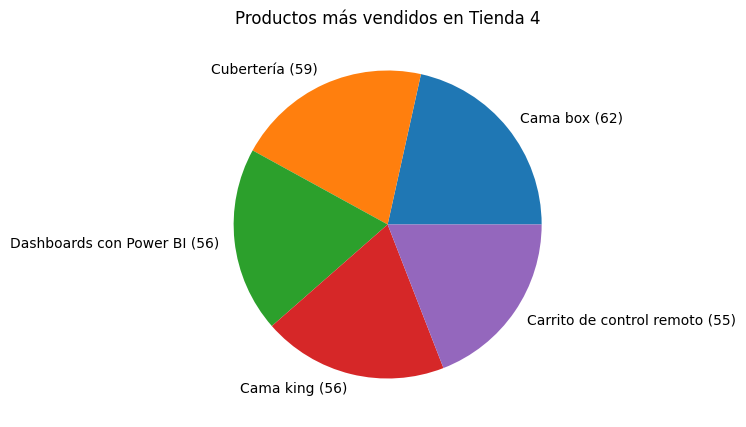

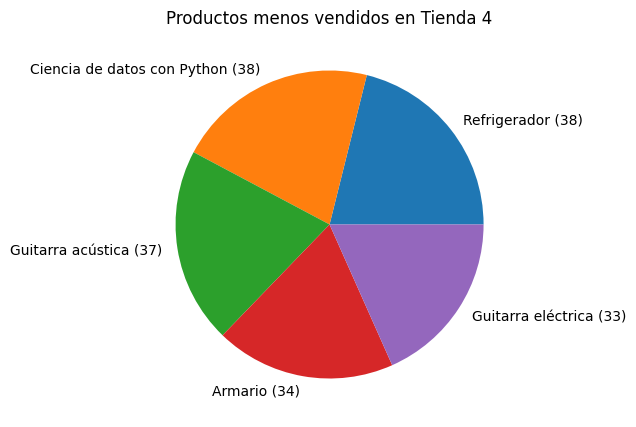

In [ ]:
for nombre_tienda in tiendas.keys():
  pie_ventas(nombre_tienda)
  pie_menos_ventas(nombre_tienda)

---
##Costo de envio promedio y total
---
### Se puede apreciar que la tienda con menor costo de envio total y promedio es la *Tienda 4* con 23.459 COP. Mientras que la *Tienda 1* tiene mayores costos de envio con 26.019 COP totales

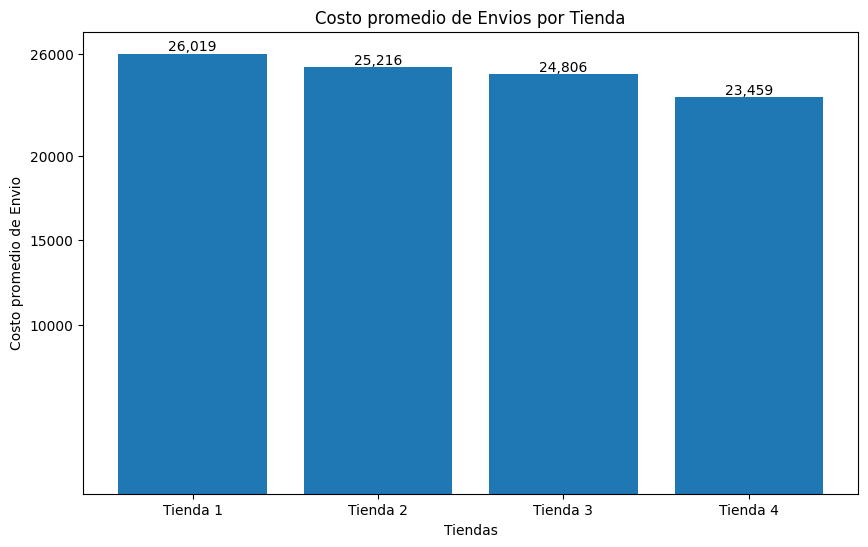

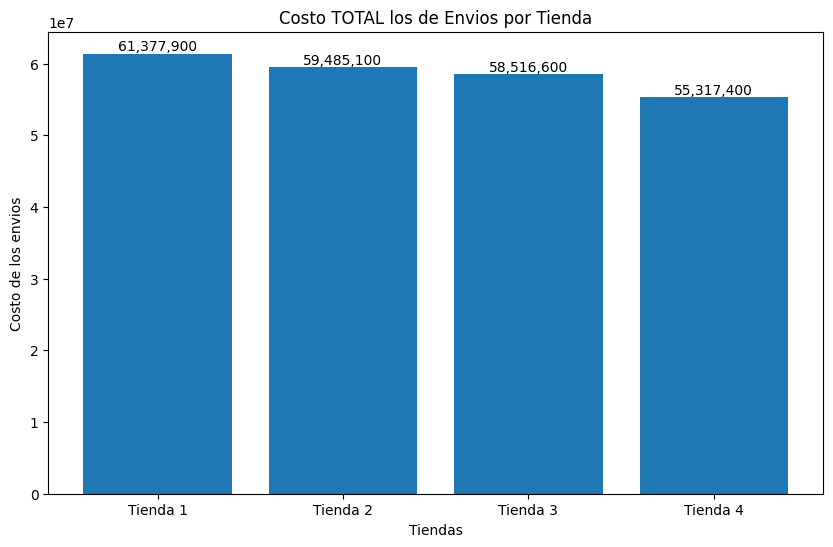

In [ ]:
barras_envio()

## Para mi recomendacion me basare en 2 aspectos
1. La ganancia neta de cada tienda tienda ( Facturacion total - Costo de envio total )
2. Calificacion de los clientes




### Ganancia neta de cada tienda:
* Tienda 1: 1.089.502,500 COP
* Tienda 2: 1.056.858,500 COP
* Tienda 3: 1.039.503,000 COP
* Tienda 4: 983.058,300 COP








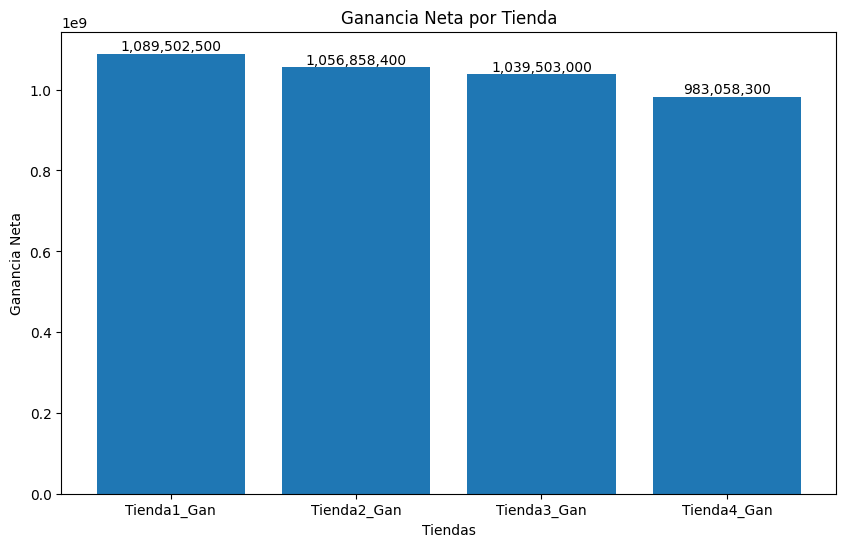

In [ ]:
Ganancia_neta = {"Tienda1_Gan": (ingresos_por_tienda ['Tienda 1'] - Costo_de_Envio_total["Tienda 1"]),
                 "Tienda2_Gan" : (ingresos_por_tienda ['Tienda 2'] - Costo_de_Envio_total["Tienda 2"]),
                  "Tienda3_Gan": (ingresos_por_tienda ['Tienda 3'] - Costo_de_Envio_total["Tienda 3"]),
                  "Tienda4_Gan": (ingresos_por_tienda ['Tienda 4'] - Costo_de_Envio_total["Tienda 4"]),
                }

x = list(Ganancia_neta.keys())
y = list(Ganancia_neta.values())

plt.figure(figsize=(10, 6))
bars=plt.bar(x,y)
plt.xlabel('Tiendas')
plt.ylabel('Ganancia Neta')
plt.title('Ganancia Neta por Tienda')
plt.bar_label(bars, labels=[f'{v:,.0f}' for v in y], label_type='edge')
plt.show()



# Conclusion y recomendaciones

### Las Tiendas 2 y 3 tienen un desempeño aceptable y solido asi que tienen un buena administracion que se debe mantener.

### La Tienda 1 sigue siendo la mas fuerte en los aspectos economicos y comerciales, pero hay que mejorar el servicio al cliente ya que tiene las peores calificaciones

### Lo mejor seria vender la Tienda 4, ya que sus ganacias son bastante bajas a comparacion de las otras tiendas. Y su calificacion esta apenas un poco encima de la Tienda 1.